In [71]:
%config IPCompleter.greedy=True

In [72]:
import pandas as pd
import numpy as np
import math
import datetime
from Tools import *

In [73]:
def format_time(dfTime):
    x=[]
    for i in dfTime:
        i=str(i)
        new_i=""
        count=1
        for j in i:
            if count%2==0 and count!=len(i):
                new_i+=j
                new_i+=":"
            else:
                new_i+=j
            count+=1
        x.append(new_i)
    xy=pd.Series(x)
    return xy

In [74]:
def add_minute(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    
    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    befor6M=c+relativedelta(minutes=-6)
    return after6M,befor6M


In [75]:
def add_minute2(df):
    from datetime import date
    from dateutil.relativedelta import relativedelta
    minutes=[]

    c=pd.to_datetime(df)
    after6M=c+relativedelta(minutes=+6)
    #befor6M=c+relativedelta(minutes=-6)
    #minutes.append([after6M,befor6M,i])
    return after6M

### Fiyatlar okunuyor. Geçici "df" e yazılıyor.

In [76]:
df=pd.read_csv("tsla.us.txt",sep=",",names=['TICKER','PER','DATE','TIME','OPEN','HIGH','LOW','CLOSE','VOL','OPENINT'])

Gereksiz kolonlar siliniyor. Date kolonu formatlanıyor

In [77]:
df=df.drop(["PER","TICKER"],axis='columns')
df["DATE2"]=pd.to_datetime(df["DATE"],format="%Y%m%d")
df["DATE2"]=df["DATE2"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y"))
df["TIME2"]=format_time(df["TIME"])
#df["ID"]=[i for i in range(0,len(df))]
df.insert(0,"ID",range(0,len(df)))

In [78]:
df.tail()

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00
2729,2729,20201019,215500,432.60,432.85,430.410,430.830,1028440,0,19/10/2020,21:55:00


Günlük fiyat değişimleri hesaplanıyor

In [79]:
df["DIFF"]=df["CLOSE"]-df["OPEN"]
df.loc[df['DIFF'] < 0, 'STATUS'] = -1
df.loc[df['DIFF'] > 0, 'STATUS'] = 1
df.loc[df['DIFF'] == 0, 'STATUS'] = 0 ## TO-DO: Bir tolerans aralığındaki değerleri 0 olarak işaretlenmesi yapıladak.
df["DIFF_PERC"]=(df["DIFF"]*100)/df["OPEN"]
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096


Zaman kolunu formatlanıyor. DATETIME kolonu oluşturuluyor

In [80]:
df["DATETIME"]=df["DATE2"]+" "+df["TIME2"]
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df["DATETIME"]=df["DATETIME"].apply(lambda x: datetime.datetime.strftime(x, "%d/%m/%Y %H:%M:%S"))
df["DATETIME"]=pd.to_datetime(df["DATETIME"])
df

,ID,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,OPENINT,DATE2,TIME2,DIFF,STATUS,DIFF_PERC,DATETIME
0,0,20200831,153000,444.61,450.49,440.110,447.029,1766358,0,31/08/2020,15:30:00,2.419,1.0,0.544072,2020-08-31 15:30:00
1,1,20200831,153500,447.04,447.80,441.210,442.160,661342,0,31/08/2020,15:35:00,-4.880,-1.0,-1.091625,2020-08-31 15:35:00
2,2,20200831,154000,442.08,452.28,440.710,452.149,722964,0,31/08/2020,15:40:00,10.069,1.0,2.277642,2020-08-31 15:40:00
3,3,20200831,154500,451.84,459.53,450.050,459.408,1570773,0,31/08/2020,15:45:00,7.568,1.0,1.674929,2020-08-31 15:45:00
4,4,20200831,155000,459.20,461.00,455.500,456.410,1346307,0,31/08/2020,15:50:00,-2.790,-1.0,-0.607578,2020-08-31 15:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,2725,20201019,213500,431.83,433.04,431.700,432.885,334562,0,19/10/2020,21:35:00,1.055,1.0,0.244309,2020-10-19 21:35:00
2726,2726,20201019,214000,432.86,432.90,431.610,431.980,274050,0,19/10/2020,21:40:00,-0.880,-1.0,-0.203299,2020-10-19 21:40:00
2727,2727,20201019,214500,432.00,433.95,431.955,433.950,268830,0,19/10/2020,21:45:00,1.950,1.0,0.451389,2020-10-19 21:45:00
2728,2728,20201019,215000,433.95,434.12,432.240,432.600,380857,0,19/10/2020,21:50:00,-1.350,-1.0,-0.311096,2020-10-19 21:50:00


<font color=aqua >Fiyatlar son haliyle "df_s" e yazılıyor. <b>Header ekleniyor</b></font>

In [81]:
df_s=df.loc[:,["ID","OPEN","HIGH","LOW","CLOSE","STATUS","DIFF_PERC","DATETIME"]]

#### 0 a yakın değerler bulunup tolerans tespit ediliyor.

[  2.   1.   0.   1.   1.   1.   2.   6.  15.  12.  33.  59. 150. 453.
 922. 635. 250.  92.  50.  14.   8.   7.   9.   3.   1.   0.   1.   1.
   0.   1.]
[-4.34388049 -4.04847583 -3.75307118 -3.45766652 -3.16226186 -2.8668572
 -2.57145255 -2.27604789 -1.98064323 -1.68523857 -1.38983392 -1.09442926
 -0.7990246  -0.50361995 -0.20821529  0.08718937  0.38259403  0.67799868
  0.97340334  1.268808    1.56421266  1.85961731  2.15502197  2.45042663
  2.74583128  3.04123594  3.3366406   3.63204526  3.92744991  4.22285457
  4.51825923]
<a list of 30 Patch objects>


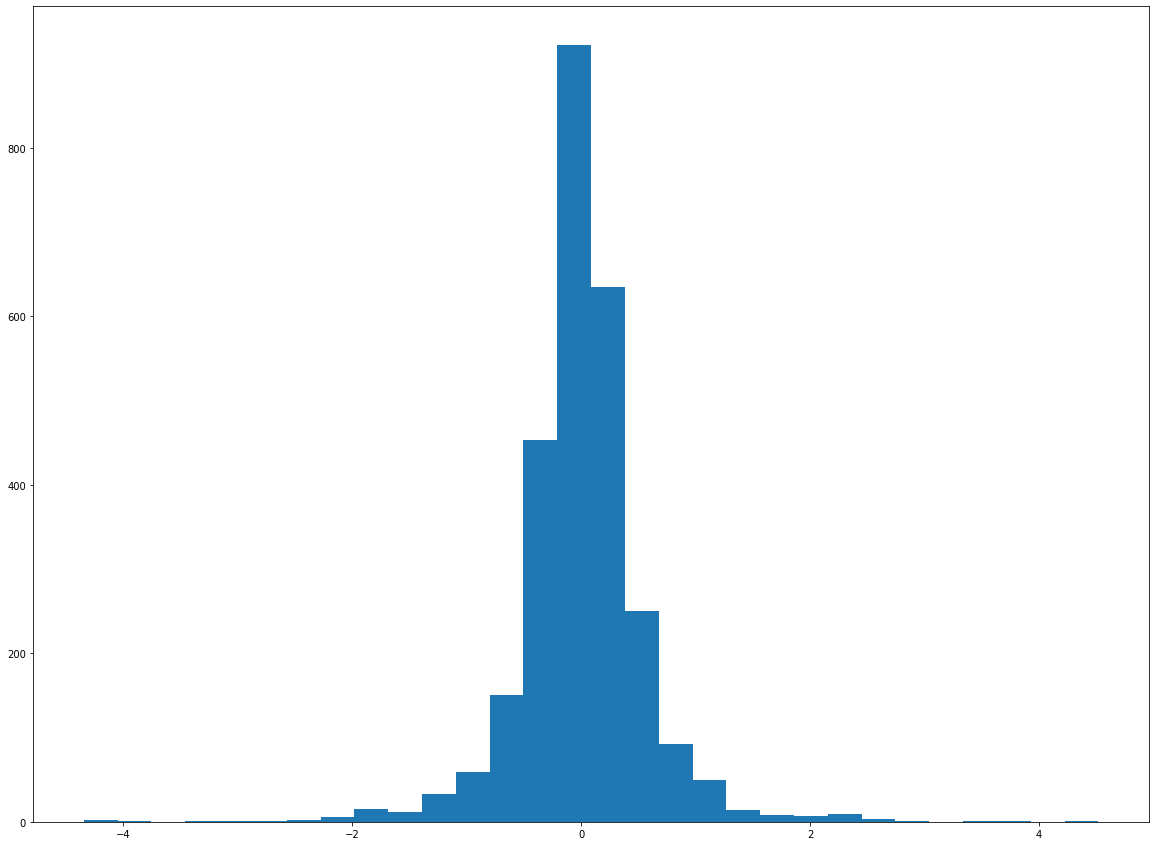

In [82]:
import matplotlib.pyplot as plt
#df_s["DIFF_PERC"].hist(bins=50)
plt.figure(figsize=(20,15))
counts, bins, bars = plt.hist(df_s["DIFF_PERC"],bins=30)
print(counts)
print(bins)
print(bars)
## -0.20821529  0.08718937 bu aralığı "0" sayacağız

### Fiyatların olduğu zaman aralığındaki haberler alınıyor.


In [83]:

print(df_s.head())

print("Index Name: ",df_s.index.name)
start_date="2020-08-31 15:30:00"
end_date="2020-08-31 15:50:00"
mask = (df_s['DATETIME'] > start_date) & (df_s['DATETIME'] <= end_date)
df_s.loc[mask]
print(df_s.head())
print(df_s.columns)
print(df_s.shape)

   ID    OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
0   0  444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   1  447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   2  442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   3  451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   4  459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 15:50:00
Index Name:  None
   ID    OPEN    HIGH     LOW    CLOSE  STATUS  DIFF_PERC            DATETIME
0   0  444.61  450.49  440.11  447.029     1.0   0.544072 2020-08-31 15:30:00
1   1  447.04  447.80  441.21  442.160    -1.0  -1.091625 2020-08-31 15:35:00
2   2  442.08  452.28  440.71  452.149     1.0   2.277642 2020-08-31 15:40:00
3   3  451.84  459.53  450.05  459.408     1.0   1.674929 2020-08-31 15:45:00
4   4  459.20  461.00  455.50  456.410    -1.0  -0.607578 2020-08-31 15:50:00
Index(['ID', 'OPEN', 'HIGH', 'LOW', 'CLOSE', '

In [84]:
print(df_s)
#Aşağıdaki commentli değerler kullanılacak
#margin_neg=-0.20821529
#margin_pos=0.08718937

margin_neg=-0.00821529
margin_pos=0.00718937

mask2 = (df_s['DIFF_PERC'] > margin_neg) & (df_s['DIFF_PERC'] <= margin_pos)
df_s.loc[mask2,"DIFF_PERC"]=0
df_s.loc[mask2,"STATUS"]=0
df_s["DIFF_PERC"].value_counts(sort=True)



        ID    OPEN    HIGH      LOW    CLOSE  STATUS  DIFF_PERC  \
0        0  444.61  450.49  440.110  447.029     1.0   0.544072   
1        1  447.04  447.80  441.210  442.160    -1.0  -1.091625   
2        2  442.08  452.28  440.710  452.149     1.0   2.277642   
3        3  451.84  459.53  450.050  459.408     1.0   1.674929   
4        4  459.20  461.00  455.500  456.410    -1.0  -0.607578   
...    ...     ...     ...      ...      ...     ...        ...   
2725  2725  431.83  433.04  431.700  432.885     1.0   0.244309   
2726  2726  432.86  432.90  431.610  431.980    -1.0  -0.203299   
2727  2727  432.00  433.95  431.955  433.950     1.0   0.451389   
2728  2728  433.95  434.12  432.240  432.600    -1.0  -0.311096   
2729  2729  432.60  432.85  430.410  430.830    -1.0  -0.409154   

                DATETIME  
0    2020-08-31 15:30:00  
1    2020-08-31 15:35:00  
2    2020-08-31 15:40:00  
3    2020-08-31 15:45:00  
4    2020-08-31 15:50:00  
...                  ...  
2725 2

 0.000000    50
-0.041436     1
-0.468416     1
-0.169503     1
 0.741910     1
             ..
 0.050261     1
 0.378900     1
 0.045746     1
 0.107498     1
-0.016662     1
Name: DIFF_PERC, Length: 2681, dtype: int64

### Tarih aralığındaki fiyatları getiren fonksiyon

In [85]:
def get_prices(start_date,end_date,df):
    mask = (df['DATETIME'] > start_date) & (df['DATETIME'] <= end_date)
    df_x=df.loc[mask]
    return df_x

## Haberler çekiliyor.

In [86]:
df_news=pd.read_csv("TeslaNews.csv")
#Gereksiz kolonlar silindi
df_news.drop(df_news.columns[df_news.columns.str.contains("Unnamed",case=False)],axis=1,inplace=True)
#Date kolonu formatlanıyor
df_news['DATETIME'] = pd.to_datetime(df_news['Dates'])
#df_news['NewDates'] = df_news['NewDates'].dt.tz_localize('US/Eastern').dt.tz_convert('UTC')
df_news['DATETIME'] = df_news['DATETIME'].apply(lambda x: datetime.datetime.replace(x, tzinfo=None))
#Tekrarlı veriler hesaplanıp temizleniyor
df_temp=df_news[df_news.duplicated(keep=False)]
print("Tüm kolonlar tekrarlı veri sayısı: ",df_temp.shape)
df_temp=df_news[df_news.duplicated(subset=["Text"],keep=False)]
print("Text kolonu  tekrarlı veri sayısı: ",df_temp.shape)
df_temp=df_temp.drop(["Link"],axis=1)
#Bunu kontrol et silinmesi gerekebilir:
df_news[df_news.duplicated(subset=["DATETIME"],keep=False)]
df_news=df_news.sort_values("DATETIME",ascending=True)
df_news.insert(0,"ID",range(0,len(df_news)))
#+- 6 dk eklendi.
for i in range(0,len(df)):
    after=add_minute(df["DATETIME"][i])[0]
    df.loc[i,"AFTER"]=after
    before=add_minute(df["DATETIME"][i])[1]
    df.loc[i,"BEFORE"]=before

df_news=df_news.sort_values("DATETIME",ascending=True)

start_date="2020-08-31 15:30:00"
end_date="2020-10-19 21:55:00"
mask = (df_news['DATETIME'] > start_date) & (df_news['DATETIME'] <= end_date)
df_news2=df_news.loc[mask]


df_news2=df_news2.drop(["ID"],axis='columns')
df_news2.insert(0,"ID",range(0,len(df_news2)))
df_news2=df_news2.set_index("ID")
#df_news2.reset_index()

#df_news2.reindex(index=df_news2.index[::-1])



C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)
C:\ProgramData\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname EST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Tüm kolonlar tekrarlı veri sayısı:  (10, 4)
Text kolonu  tekrarlı veri sayısı:  (100, 4)


In [88]:
count=0
df_x=pd.DataFrame()
df_news2["diff"]=np.nan
df_news2["change_rate"]=np.nan
for i in range(0,len(df_news2)):

    if i==len(df_news2)-1:
        start_date=df_news2["DATETIME"][i]
        end_date=start_date
    else:

        start_date=df_news2["DATETIME"][i]
        end_date=df_news2["DATETIME"][i+1]
    #print(get_prices(end_date,start_date,df_news2))
    
    df_temp=pd.DataFrame(get_prices(start_date,end_date,df_s))
    if not df_temp.empty:
        df_temp=df_temp.iloc[[0,-1]]
        df1=df_temp.iloc[0,4]
        df2=df_temp.iloc[1,4]
        df_diff=df2-df1
        df_change_rate=df_diff/df1
        print("Haber: ",df_news["Text"][i])
        print(df_diff)
        print(df_change_rate)
        df_news2["diff"][i]=df_diff
        df_news2["change_rate"][i]=df_change_rate
        df_x.append(df_temp,ignore_index=True)
        
    
    count+=1
    stri="Start Date: "+str(start_date)+"\t"+"End Date: "+str(end_date)

    del df_temp

Haber:  Electric vehicle pioneer Tesla (NASDAQ: TSLA) is attempting to revolutionize the automobile industry, and with visionary CEO Elon Musk at the helm, it looks to have a bright future in a fast-growing market. Knowing this, investors have bid up Tesla's shares to the tune of 787% in the past year. The S&P 500 has risen by a comparatively meager 18% in the same period. The downside to Tesla's stellar gains, though, is that its stock now looks overvalued. The company is trading at 1,130 times past and 232 times future earnings, and boasts a market cap of about $405 billion. At those levels, many years of success are already factored into Tesla's share price. As such, investors today might be better served to look elsewhere for growth stocks. One in particular that is worth your attention is Intuitive Surgical (NASDAQ: ISRG). Here's why the healthcare giant is a better growth buy than Tesla right now. TSLA data by YChartsIntuitive is best known for its da Vinci surgical system, the l

C:\Users\enesy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\enesy\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Haber:  Shares of Tesla (NASDAQ: TSLA) jumped Monday morning, rising as much as 5.1%. As of 12:15 p.m. EDT, the stock was up 3.2%.The growth stock's gain comes as the automaker signed an agreement with Piedmont LithiumÂ (NASDAQ: PLL) for lithium supply. In addition, Tesla may be looking to acquire a stake in LG Energy Solution, a battery business that will soon divest from LG Chem, according to a separate report.Image source: Getty Images.The news of Tesla's five-year lithium supply agreement with Piedmont puts some action behind some of the bold vision the electric-car company laid out for its battery ambitions at its Battery Day event last week."We are excited to be working with Tesla, which represents the start of the first US domestic lithium supply chain and a disruption to the current value chain," said Piedmont CEO Keith Phillips in a press release Monday morning.A stake in LG Energy Solution would similarly bolster Tesla's competitive positioning in the battery industry. "Tesla

In [89]:
df_x

""


In [90]:
a=10
for i in range(0,a):
    if i==a-1:
        print(i)


9


In [91]:
df_n=pd.read_csv("TeslaNews.csv")

In [92]:
df_n.head()

,Unnamed: 0,Dates,Text,Link
0,0,Oct 13 2020 7:41AM EDT,Eikon search string for individual stock moves...,https://www.nasdaq.com/articles/buzz-u.s.-stoc...
1,1,Oct 13 2020 7:11AM EDT,"Back in 1993, when drugmaker Amarin's (NASDAQ:...",https://www.nasdaq.com/articles/the-top-2-cont...
2,2,Oct 13 2020 7:06AM EDT,Electric vehicle pioneer Tesla (NASDAQ: TSLA) ...,https://www.nasdaq.com/articles/forget-tesla-i...
3,3,Oct 13 2020 6:22AM EDT,Oct 13 (Reuters) - Tesla Inc TSLA.Osaid on Tue...,https://www.nasdaq.com/articles/tesla-cuts-pri...
4,4,Oct 13 2020 5:28AM EDT,"Adds details, backgroundBEIJING, Oct 13 (Reute...",https://www.nasdaq.com/articles/audi-to-launch...


In [93]:
df_n.tail()

,Unnamed: 0,Dates,Text,Link
9595,9595,Apr 29 2016 3:43AM EDT,Tesla CEO Elon Musk introduces the Model X. So...,https://www.nasdaq.com/articles/mark-zuckerber...
9596,9596,Apr 29 2016 2:22AM EDT,Ford ( F ) reported an all time record pre-tax...,https://www.nasdaq.com/articles/ford-posts-rec...
9597,9597,Apr 28 2016 11:44AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/alphabet-inc%3...
9598,9598,Apr 28 2016 10:23AM EDT,InvestorPlaceInvestorPlace - Stock Market New...,https://www.nasdaq.com/articles/apple-inc.-aap...
9599,9599,Apr 28 2016 10:00AM EDT,Energy storage has finally captured the imagin...,https://www.nasdaq.com/articles/lockheed-marti...


- [ ] iso format--> ytc--edt dönüşümleri incelenecek
- [x] api entegre edildi
```python
    print("hello")
```

<span style="font-family:Consolas">Text</span>

<div class="alert alert-block alert-info">
<b>Yapılacaklar:</b></br> 
1) iso format--> utc--edt dönüşümleri incelenecek</br>
2) Belli zaman aralığındaki veriler çekilecek
</div>

<div class="alert alert-block alert-success">
<b>Tamamlanan:</b> api entegre edildi.
</div>

<div class="alert alert-block alert-danger">
<b>Hata:</b> Hata yok.
</div>

<div class="alert alert-block alert-warning">
<b>Dikkat edilecekler:</b> ----
</div>

In [136]:
import requests
from datetime import date, timedelta
params = {
  'access_key': 'a7d3fe82fc47113f6c6da407a7d35041'
}
acc_key='a7d3fe82fc47113f6c6da407a7d35041'

api_res=[]
df_api=pd.DataFrame()
start_date = datetime.date(2020, 10, 28)
#start_date=start_date.isoformat()
#end_date = date(2020, 11, 1)
delta = timedelta(days=2)

#start_date="2020-01-01"
end_date=start_date+delta

print(start_date)
print(end_date)
#s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=30min&date_from="+str(start_date)+"&date_to="+str(end_date)
#s=r"http://api.marketstack.com/v1/intraday?access_key="+acc_key+"&symbols=TSLA&interval=1h&date_from=2020-11-01&date_to=2020-11-02"

# Çalışan:
#s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from=2020-11-01&date_to=2020-11-03"
s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from="+str(start_date)+"&date_to="+str(end_date)
#s=r"http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from="+str(start_date)+"&date_to="+str(end_date)
print(s)
api_result = requests.get(s, params)
api_response = api_result.json()
print(api_response)
df_c=pd.DataFrame({"open":[0],"close":[0],"date":["2020-11-02T20:45:00+0000"]})
print("Open\tClose\tLast\tHigh\tDate")
for stock_data in api_response['data']:
    df_ct=pd.DataFrame({"open":[stock_data['open']],"close":[stock_data['close']],"last":stock_data["last"],"high":stock_data["high"],"date":[stock_data['date']]})
    
    ss=str(stock_data['open']) + "\t"+ str(stock_data['close']) + "\t" + str(stock_data["last"]) + "\t" + str(stock_data["high"]) + "\t" + str(stock_data['date'])
    print(ss)
    df_c.append(df_ct)
    del df_ct



2020-10-28
2020-10-30
http://api.marketstack.com/v1/intraday?access_key=a7d3fe82fc47113f6c6da407a7d35041&symbols=TSLA&interval=15min&date_from=2020-10-28&date_to=2020-10-30
{'pagination': {'limit': 100, 'offset': 0, 'count': 81, 'total': 81}, 'data': [{'open': 409.96, 'high': 418.06, 'low': 406.46, 'last': 410.83, 'close': 406.02, 'volume': 22315633.0, 'date': '2020-10-30T00:00:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 412.54, 'high': 412.72, 'low': 412.48, 'last': None, 'close': 412.7, 'volume': None, 'date': '2020-10-29T23:45:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 414.215, 'high': 414.215, 'low': 413.955, 'last': None, 'close': 413.99, 'volume': None, 'date': '2020-10-29T23:30:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 413.71, 'high': 413.73, 'low': 413.53, 'last': None, 'close': 413.57, 'volume': None, 'date': '2020-10-29T23:15:00+0000', 'symbol': 'TSLA', 'exchange': 'IEXG'}, {'open': 412.31, 'high': 412.31, 'low': 412.31, 'last': No

In [49]:
x = datetime.datetime(2020, 1, 1,0, 0, 1,)
x=x.isoformat()
x

'2020-01-01T00:00:01'

In [112]:
df_c

,open,close,date
0,0.00,0.00,2020-11-02T20:45:00+0000
0,392.73,388.04,2020-11-02T20:45:00+0000
0,392.73,388.04,2020-11-02T20:30:00+0000
0,392.73,388.04,2020-11-02T20:15:00+0000
0,392.73,388.04,2020-11-02T20:00:00+0000
0,392.73,388.04,2020-11-02T19:45:00+0000
0,392.73,388.04,2020-11-02T19:30:00+0000
0,392.73,388.04,2020-11-02T19:00:00+0000
0,392.73,388.04,2020-11-02T18:45:00+0000
0,392.73,388.04,2020-11-02T18:30:00+0000


In [109]:
df_c.empty

False

In [120]:
time = datetime.datetime.now()
ISO_8601_time = time.isoformat()

print(ISO_8601_time)

2020-11-03T22:43:22.500858
